In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Crude Birth Rate and Education Relationship Data 2013.xlsx")
df.head(15)

,Country Name,Country Abbreviation,"Birth rate, crude (per 1,000 people) 2013",Mean years of schooling (males aged 25 years and above) (years) 2013,GDP per capita (current US$) 2013
0,Afghanistan,AFG,36.670,5.1,637.165523
1,Albania,ALB,12.257,9.5,4413.060861
2,Algeria,DZA,25.451,7.8,5499.581487
3,Argentina,ARG,17.831,9.6,13080.254732
4,Armenia,ARM,15.125,10.8,3838.185801
5,Australia,AUS,13.300,13.1,68150.107041
6,Austria,AUT,9.400,10.7,50716.708706
7,Azerbaijan,AZE,18.300,11.2,7875.756953
8,"Bahamas, The",BHS,14.485,11.1,28768.029894
9,Bahrain,BHR,15.727,9.6,24744.296959


In [3]:
df

,Country Name,Country Abbreviation,"Birth rate, crude (per 1,000 people) 2013",Mean years of schooling (males aged 25 years and above) (years) 2013,GDP per capita (current US$) 2013
0,Afghanistan,AFG,36.670,5.1,637.165523
1,Albania,ALB,12.257,9.5,4413.060861
2,Algeria,DZA,25.451,7.8,5499.581487
3,Argentina,ARG,17.831,9.6,13080.254732
4,Armenia,ARM,15.125,10.8,3838.185801
...,...,...,...,...,...
159,Vietnam,VNM,17.333,5.7,1886.671896
160,"Yemen, Rep.",YEM,33.229,3.8,1607.152365
161,Zambia,ZMB,39.339,7.2,1878.907001
162,Zimbabwe,ZWE,35.768,7.8,1430.000818


In [4]:
data = np.array(df)
data = data[:,2:]
data

array([[36.67, 5.1, 637.165523187024],
       [12.257, 9.5, 4413.06086120676],
       [25.451, 7.8, 5499.58148704572],
       [17.831, 9.6, 13080.2547323367],
       [15.125, 10.8, 3838.18580148382],
       [13.3, 13.1, 68150.1070413215],
       [9.4, 10.7, 50716.7087062864],
       [18.3, 11.2, 7875.75695254288],
       [14.485, 11.1, 28768.0298936727],
       [15.727, 9.6, 24744.296958551],
       [19.862, 5.6, 981.839879150399],
       [11.067, 9.2, 16451.1635759912],
       [12.5, 11.7, 7978.87261471076],
       [11.3, 10.7, 46744.6625441516],
       [22.395, 9.3, 4568.50295763852],
       [38.219, 4.4, 1251.21051783537],
       [23.661, 10.0, 2908.20008548078],
       [8.963, 9.5, 5131.39450642932],
       [27.231, 9.0, 7224.96517150786],
       [14.772, 7.2, 12300.3248822758],
       [17.052, 8.8, 44740.085018517],
       [9.2, 10.5, 7651.8178806676],
       [40.543, 1.1, 787.47017629755],
       [41.933, 3.3, 256.976002796754],
       [24.422, 5.0, 1013.4204006154],
       [38.0

In [5]:
print(df['Birth rate, crude (per 1,000 people) 2013'])

0      36.670
1      12.257
2      25.451
3      17.831
4      15.125
        ...  
159    17.333
160    33.229
161    39.339
162    35.768
163     8.500
Name: Birth rate, crude (per 1,000 people) 2013, Length: 164, dtype: float64


In [6]:
print(df['GDP per capita (current US$) 2013'])

0        637.165523
1       4413.060861
2       5499.581487
3      13080.254732
4       3838.185801
           ...     
159     1886.671896
160     1607.152365
161     1878.907001
162     1430.000818
163    21973.000000
Name: GDP per capita (current US$) 2013, Length: 164, dtype: float64


In [7]:
X = df['GDP per capita (current US$) 2013']
y = df['Birth rate, crude (per 1,000 people) 2013']

In [8]:
length = len(df['Country Name'])

In [9]:
country_name = df['Country Name']

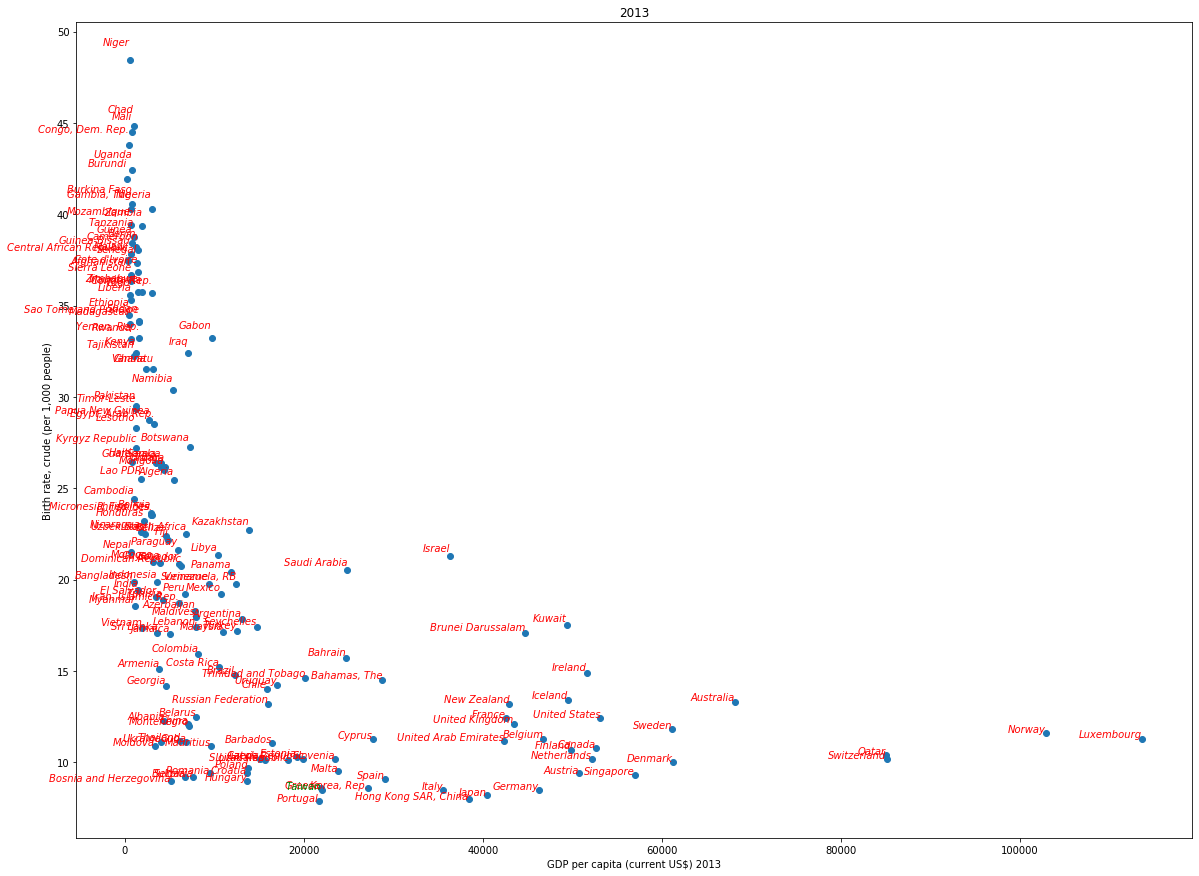

In [10]:
# Create a plot.
plt.figure(figsize = (20, 15))

plt.scatter(X, y)
plt.title("2013")
plt.xlabel("GDP per capita (current US$) 2013")
plt.ylabel("Birth rate, crude (per 1,000 people)")

# Add country name tag.
for i in range(length):
    if country_name[i] == "Taiwan":
        plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "green", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
    else:
        plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [11]:
X = df['Mean years of schooling (males aged 25 years and above) (years) 2013']
y = df['Birth rate, crude (per 1,000 people) 2013']

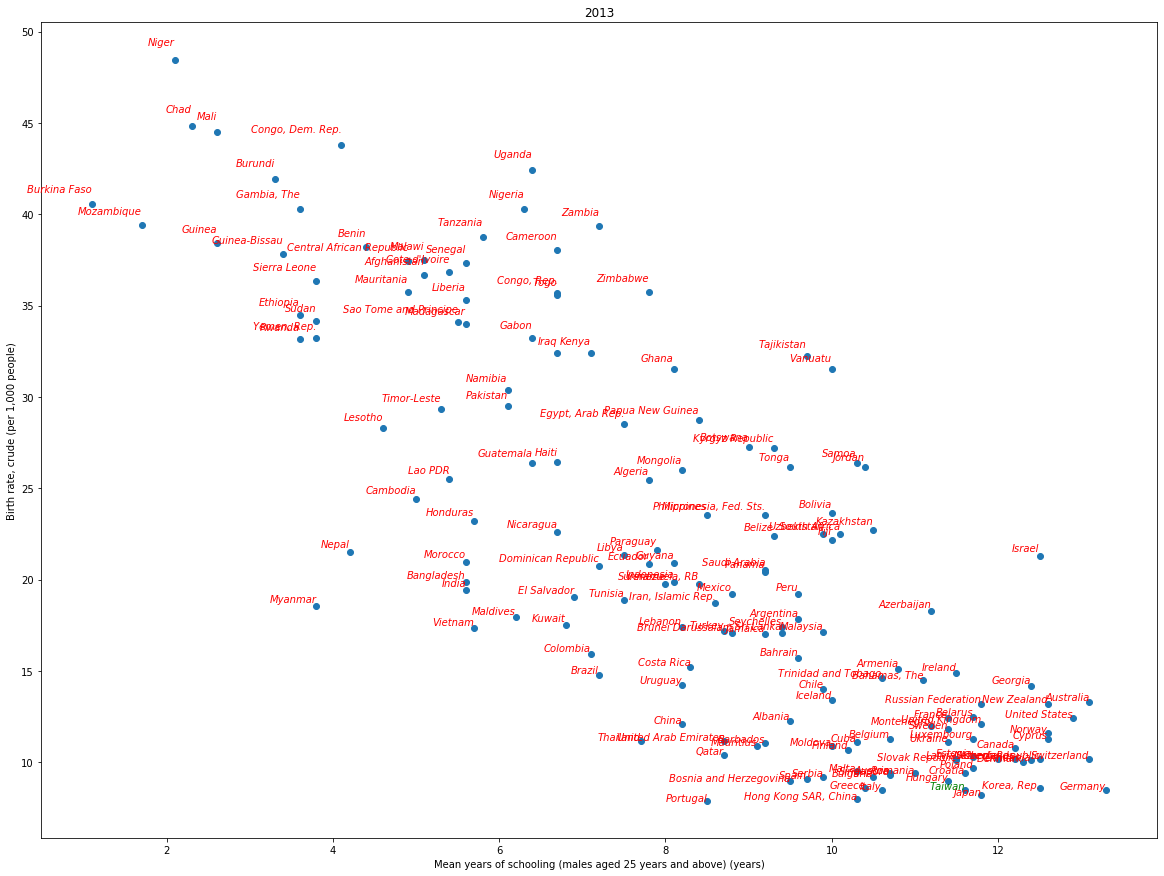

In [12]:
# Create a plot.
plt.figure(figsize = (20, 15))

plt.scatter(X, y)
plt.title("2013")
plt.xlabel("Mean years of schooling (males aged 25 years and above) (years)")
plt.ylabel("Birth rate, crude (per 1,000 people)")

# Add country name tag.
for i in range(length):
    if country_name[i] == "Taiwan":
        plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "green", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
    else:
        plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [13]:
df

,Country Name,Country Abbreviation,"Birth rate, crude (per 1,000 people) 2013",Mean years of schooling (males aged 25 years and above) (years) 2013,GDP per capita (current US$) 2013
0,Afghanistan,AFG,36.670,5.1,637.165523
1,Albania,ALB,12.257,9.5,4413.060861
2,Algeria,DZA,25.451,7.8,5499.581487
3,Argentina,ARG,17.831,9.6,13080.254732
4,Armenia,ARM,15.125,10.8,3838.185801
...,...,...,...,...,...
159,Vietnam,VNM,17.333,5.7,1886.671896
160,"Yemen, Rep.",YEM,33.229,3.8,1607.152365
161,Zambia,ZMB,39.339,7.2,1878.907001
162,Zimbabwe,ZWE,35.768,7.8,1430.000818


In [14]:
data = np.array(df)

In [15]:
data

array([['Afghanistan', 'AFG', 36.67, 5.1, 637.165523187024],
       ['Albania', 'ALB', 12.257, 9.5, 4413.06086120676],
       ['Algeria', 'DZA', 25.451, 7.8, 5499.58148704572],
       ['Argentina', 'ARG', 17.831, 9.6, 13080.2547323367],
       ['Armenia', 'ARM', 15.125, 10.8, 3838.18580148382],
       ['Australia', 'AUS', 13.3, 13.1, 68150.1070413215],
       ['Austria', 'AUT', 9.4, 10.7, 50716.7087062864],
       ['Azerbaijan', 'AZE', 18.3, 11.2, 7875.75695254288],
       ['Bahamas, The', 'BHS', 14.485, 11.1, 28768.0298936727],
       ['Bahrain', 'BHR', 15.727, 9.6, 24744.296958551],
       ['Bangladesh', 'BGD', 19.862, 5.6, 981.839879150399],
       ['Barbados', 'BRB', 11.067, 9.2, 16451.1635759912],
       ['Belarus', 'BLR', 12.5, 11.7, 7978.87261471076],
       ['Belgium', 'BEL', 11.3, 10.7, 46744.6625441516],
       ['Belize', 'BLZ', 22.395, 9.3, 4568.50295763852],
       ['Benin', 'BEN', 38.219, 4.4, 1251.21051783537],
       ['Bolivia', 'BOL', 23.661, 10.0, 2908.20008548078],
  

In [16]:
data = data[:,3:]

In [17]:
data = np.array(data, dtype=float)

In [18]:
data

array([[5.10000000e+00, 6.37165523e+02],
       [9.50000000e+00, 4.41306086e+03],
       [7.80000000e+00, 5.49958149e+03],
       [9.60000000e+00, 1.30802547e+04],
       [1.08000000e+01, 3.83818580e+03],
       [1.31000000e+01, 6.81501070e+04],
       [1.07000000e+01, 5.07167087e+04],
       [1.12000000e+01, 7.87575695e+03],
       [1.11000000e+01, 2.87680299e+04],
       [9.60000000e+00, 2.47442970e+04],
       [5.60000000e+00, 9.81839879e+02],
       [9.20000000e+00, 1.64511636e+04],
       [1.17000000e+01, 7.97887261e+03],
       [1.07000000e+01, 4.67446625e+04],
       [9.30000000e+00, 4.56850296e+03],
       [4.40000000e+00, 1.25121052e+03],
       [1.00000000e+01, 2.90820009e+03],
       [9.50000000e+00, 5.13139451e+03],
       [9.00000000e+00, 7.22496517e+03],
       [7.20000000e+00, 1.23003249e+04],
       [8.80000000e+00, 4.47400850e+04],
       [1.05000000e+01, 7.65181788e+03],
       [1.10000000e+00, 7.87470176e+02],
       [3.30000000e+00, 2.56976003e+02],
       [5.000000

In [19]:
data

array([[5.10000000e+00, 6.37165523e+02],
       [9.50000000e+00, 4.41306086e+03],
       [7.80000000e+00, 5.49958149e+03],
       [9.60000000e+00, 1.30802547e+04],
       [1.08000000e+01, 3.83818580e+03],
       [1.31000000e+01, 6.81501070e+04],
       [1.07000000e+01, 5.07167087e+04],
       [1.12000000e+01, 7.87575695e+03],
       [1.11000000e+01, 2.87680299e+04],
       [9.60000000e+00, 2.47442970e+04],
       [5.60000000e+00, 9.81839879e+02],
       [9.20000000e+00, 1.64511636e+04],
       [1.17000000e+01, 7.97887261e+03],
       [1.07000000e+01, 4.67446625e+04],
       [9.30000000e+00, 4.56850296e+03],
       [4.40000000e+00, 1.25121052e+03],
       [1.00000000e+01, 2.90820009e+03],
       [9.50000000e+00, 5.13139451e+03],
       [9.00000000e+00, 7.22496517e+03],
       [7.20000000e+00, 1.23003249e+04],
       [8.80000000e+00, 4.47400850e+04],
       [1.05000000e+01, 7.65181788e+03],
       [1.10000000e+00, 7.87470176e+02],
       [3.30000000e+00, 2.56976003e+02],
       [5.000000

In [20]:
data = sm.add_constant(data, prepend = True)

In [21]:
data

array([[1.00000000e+00, 5.10000000e+00, 6.37165523e+02],
       [1.00000000e+00, 9.50000000e+00, 4.41306086e+03],
       [1.00000000e+00, 7.80000000e+00, 5.49958149e+03],
       [1.00000000e+00, 9.60000000e+00, 1.30802547e+04],
       [1.00000000e+00, 1.08000000e+01, 3.83818580e+03],
       [1.00000000e+00, 1.31000000e+01, 6.81501070e+04],
       [1.00000000e+00, 1.07000000e+01, 5.07167087e+04],
       [1.00000000e+00, 1.12000000e+01, 7.87575695e+03],
       [1.00000000e+00, 1.11000000e+01, 2.87680299e+04],
       [1.00000000e+00, 9.60000000e+00, 2.47442970e+04],
       [1.00000000e+00, 5.60000000e+00, 9.81839879e+02],
       [1.00000000e+00, 9.20000000e+00, 1.64511636e+04],
       [1.00000000e+00, 1.17000000e+01, 7.97887261e+03],
       [1.00000000e+00, 1.07000000e+01, 4.67446625e+04],
       [1.00000000e+00, 9.30000000e+00, 4.56850296e+03],
       [1.00000000e+00, 4.40000000e+00, 1.25121052e+03],
       [1.00000000e+00, 1.00000000e+01, 2.90820009e+03],
       [1.00000000e+00, 9.50000

In [22]:
y = np.array(y)

In [23]:
y

array([36.67 , 12.257, 25.451, 17.831, 15.125, 13.3  ,  9.4  , 18.3  ,
       14.485, 15.727, 19.862, 11.067, 12.5  , 11.3  , 22.395, 38.219,
       23.661,  8.963, 27.231, 14.772, 17.052,  9.2  , 40.543, 41.933,
       24.422, 38.02 , 10.8  , 37.427, 44.841, 14.002, 12.08 , 15.945,
       43.771, 35.663, 15.194, 36.812,  9.4  , 11.108, 11.255, 10.2  ,
       10.   , 20.761, 20.848, 28.518, 19.036, 10.3  , 34.483, 22.185,
       10.7  , 12.4  , 33.242, 40.295, 14.186,  8.5  , 31.5  ,  8.6  ,
       26.369, 38.422, 37.841, 20.918, 26.423, 23.223,  8.   ,  9.   ,
       13.4  , 19.416, 19.893, 18.739, 32.378, 14.9  , 21.3  ,  8.5  ,
       17.012,  8.2  , 26.157, 22.73 , 32.415,  8.6  , 17.537, 27.2  ,
       25.496, 10.2  , 17.38 , 28.318, 35.316, 21.336, 10.1  , 11.3  ,
       33.989, 37.506, 17.106, 17.939, 44.482,  9.5  , 35.729, 10.9  ,
       19.198, 23.521, 10.886, 26.026, 11.987, 20.964, 39.396, 18.544,
       30.391, 21.523, 10.2  , 13.2  , 22.585, 48.466, 40.267, 11.6  ,
      

In [24]:
print(len(X))

164


In [25]:
print(len(data))

164


In [26]:
print(len(y))

164


In [27]:
# Ordinary least square method.
mod = sm.OLS(y, data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     151.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           9.54e-38
Time:                        23:30:15   Log-Likelihood:                -532.72
No. Observations:                 164   AIC:                             1071.
Df Residuals:                     161   BIC:                             1081.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0291      1.644     27.398      0.0

In [28]:
# Replace GDP Per Capita with log(GDP Per Capita)

In [29]:
data

array([[1.00000000e+00, 5.10000000e+00, 6.37165523e+02],
       [1.00000000e+00, 9.50000000e+00, 4.41306086e+03],
       [1.00000000e+00, 7.80000000e+00, 5.49958149e+03],
       [1.00000000e+00, 9.60000000e+00, 1.30802547e+04],
       [1.00000000e+00, 1.08000000e+01, 3.83818580e+03],
       [1.00000000e+00, 1.31000000e+01, 6.81501070e+04],
       [1.00000000e+00, 1.07000000e+01, 5.07167087e+04],
       [1.00000000e+00, 1.12000000e+01, 7.87575695e+03],
       [1.00000000e+00, 1.11000000e+01, 2.87680299e+04],
       [1.00000000e+00, 9.60000000e+00, 2.47442970e+04],
       [1.00000000e+00, 5.60000000e+00, 9.81839879e+02],
       [1.00000000e+00, 9.20000000e+00, 1.64511636e+04],
       [1.00000000e+00, 1.17000000e+01, 7.97887261e+03],
       [1.00000000e+00, 1.07000000e+01, 4.67446625e+04],
       [1.00000000e+00, 9.30000000e+00, 4.56850296e+03],
       [1.00000000e+00, 4.40000000e+00, 1.25121052e+03],
       [1.00000000e+00, 1.00000000e+01, 2.90820009e+03],
       [1.00000000e+00, 9.50000

In [30]:
data[:,2] = np.log(data[:,2])

In [31]:
data

array([[ 1.        ,  5.1       ,  6.45702947],
       [ 1.        ,  9.5       ,  8.3923238 ],
       [ 1.        ,  7.8       ,  8.61242728],
       [ 1.        ,  9.6       ,  9.4788591 ],
       [ 1.        , 10.8       ,  8.25275509],
       [ 1.        , 13.1       , 11.12946801],
       [ 1.        , 10.7       , 10.8340107 ],
       [ 1.        , 11.2       ,  8.97154458],
       [ 1.        , 11.1       , 10.26701998],
       [ 1.        ,  9.6       , 10.11635032],
       [ 1.        ,  5.6       ,  6.88942824],
       [ 1.        ,  9.2       ,  9.70815149],
       [ 1.        , 11.7       ,  8.9845524 ],
       [ 1.        , 10.7       , 10.75245536],
       [ 1.        ,  9.3       ,  8.42694085],
       [ 1.        ,  4.4       ,  7.13186678],
       [ 1.        , 10.        ,  7.97528964],
       [ 1.        ,  9.5       ,  8.54313273],
       [ 1.        ,  9.        ,  8.88529769],
       [ 1.        ,  7.2       ,  9.41738095],
       [ 1.        ,  8.8       , 10.708

In [32]:
# Ordinary least square method.
mod = sm.OLS(y, data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           9.45e-46
Time:                        23:30:15   Log-Likelihood:                -513.95
No. Observations:                 164   AIC:                             1034.
Df Residuals:                     161   BIC:                             1043.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6940      2.953     21.905      0.0